## Analyze List of GWAS SNPs 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dir_name = "/data/list_of_snps/"

In [2]:
# load (processed) list of snps
data = pd.read_csv(dir_name+"LIST_OF_SNPS.txt",delim_whitespace=True)
data.info()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2420360 entries, 0 to 2420359
Data columns (total 13 columns):
SNP                     object
chr_pos_hg38            object
reference_allele        object
other_allele            object
ref_allele_frequency    float64
pvalue                  float64
het_pvalue              float64
log_odds                float64
log_odds_se             float64
N_case                  int64
N_control               object
model                   object
chr_pos_(b36)           object
dtypes: float64(5), int64(1), object(7)
memory usage: 258.5+ MB


In [3]:
# column names
columns = list(data.columns)

['SNP', 'chr_pos_hg38', 'reference_allele', 'other_allele', 'ref_allele_frequency', 'pvalue', 'het_pvalue', 'log_odds', 'log_odds_se', 'N_case', 'N_control', 'model', 'chr_pos_(b36)']


In [4]:
# view first 10 rows of data
data[0:10]

,SNP,chr_pos_hg38,reference_allele,other_allele,ref_allele_frequency,pvalue,het_pvalue,log_odds,log_odds_se,N_case,N_control,model,chr_pos_(b36)
0,rs12565286,chr1:785910,C,G,0.053807,0.065121,0.999669,0.128201,0.069507,6659,20465,FE,chr1:711153
1,rs11804171,chr1:788439,T,A,0.945969,0.063282,0.999219,-0.129787,0.069883,6017,20242,FE,chr1:713682
2,rs3094315,chr1:817186,G,A,0.175100,0.954515,0.993459,0.001661,0.029119,9714,26820,FE,chr1:742429
3,rs3131968,chr1:818812,G,A,0.769870,0.357169,0.514645,-0.028962,0.031454,10213,12604,FE,chr1:744055
4,rs2905035,chr1:840279,G,A,0.819874,0.882315,0.531465,-0.004028,0.027213,13523,33607,FE,chr1:765522
5,rs2980319,chr1:841742,T,A,0.820539,0.973083,0.607472,-0.000913,0.027043,14201,33867,FE,chr1:766985
6,rs4040617,chr1:843942,G,A,0.136530,0.948151,0.647003,-0.001745,0.026836,13950,33841,FE,chr1:769185
7,rs2977612,chr1:845405,T,A,0.136586,0.998927,0.554126,0.000036,0.027141,13433,33517,FE,chr1:770648
8,rs2905062,chr1:849670,G,A,0.138045,0.992751,0.623961,-0.000246,0.027049,13331,33372,FE,chr1:774913
9,rs2980300,chr1:850609,C,T,0.853780,0.832975,0.771660,0.005474,0.025956,14715,34231,FE,chr1:775852


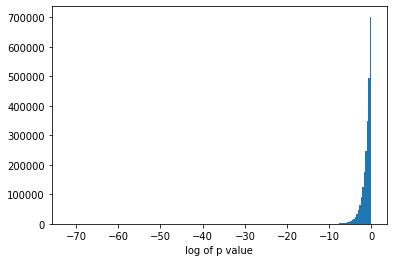

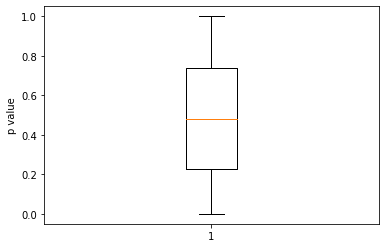

In [12]:
# visualize data
plt.figure()
plt.hist(np.log(data["pvalue"]), bins=200)
plt.xlabel('log of p value')
plt.show()

plt.figure()
plt.boxplot(data["pvalue"])
plt.ylabel('p value')
plt.show()

In [ ]:
# simple analysis of pvalue
print("total ", len(data["pvalue"]))
print("<0.01  ", np.sum(np.abs(data["pvalue"])<0.01))
print("<1e-3  ", np.sum(np.abs(data["pvalue"])<1e-3))
print("<1e-5  ", np.sum(np.abs(data["pvalue"])<1e-5))
print("<5e-7  ", np.sum(np.abs(data["pvalue"])<5e-7))